# Problems for Week 6

# Part 1

### Problem 1 (1 point)
Modify the code example introduced in the video to calculate the normalized logarithmic return $G_\tau(t)$ of Apple's stock for a time duration of $\tau = 30, 90, 180$ days, using the historical data from January 1st 1989 to December 31st 2016. For this, you should call the `computeReturn` function three times, one for each value of $\tau$ (be sure to give each a different label within the Data Frame). Plot the (normalized) histogram of the returns on the same plot. Which of the following graphs (G11 - G15) is the closest to what you obtained? (use $n=40$ bins when plotting the histograms). 

- G01 <img src="fig/06/G01.png" width="600" />

- G02 <img src="fig/06/G02.png" width="600" />

- G03 <img src="fig/06/G03.png" width="600" />

- G04 <img src="fig/06/G04.png" width="600" />

- G05 <img src="fig/06/G05.png" width="600" />


### Answer 1

- G03

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)
def problem1(cols,taus):
    from datetime import datetime
    from pandas_datareader import data as pdr
    from pandas_datareader import wb as pwb
    # Logarithmic return of price time series
    def logreturn(Pt,tau=1):
        return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
    # Normalize data to have unit variance (<(x - <x>)^2> = 1)
    def normalized(data):
        return (data/np.sqrt(np.var(data)))
    # Add G_tau to data frame object
    def computeReturn(data, name, tau):
        data[name]=pd.Series(normalized(logreturn(data['Adj Close'].values, tau)),index=data.index[:-tau])
        
    # define time interval
    end_time   = datetime(2016, 12, 31)
    start_time = datetime(1989, 1, 1)
    apple      = pdr.DataReader('AAPL','yahoo',start_time,end_time)
    for col,tau in zip(cols,taus):
        computeReturn(apple, col, tau)
    return apple
def plot1(ax, data, cols, labels):
    for col,lbl in zip(cols,labels):
        data[col].hist(ax=ax,alpha=0.6, normed=True, bins=40, lw=0, label=lbl)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,0.6])
    ax.legend()
    ax.set_xlabel('Normalized price return $G_n(t)$')
    ax.set_ylabel('Probability Distribution')

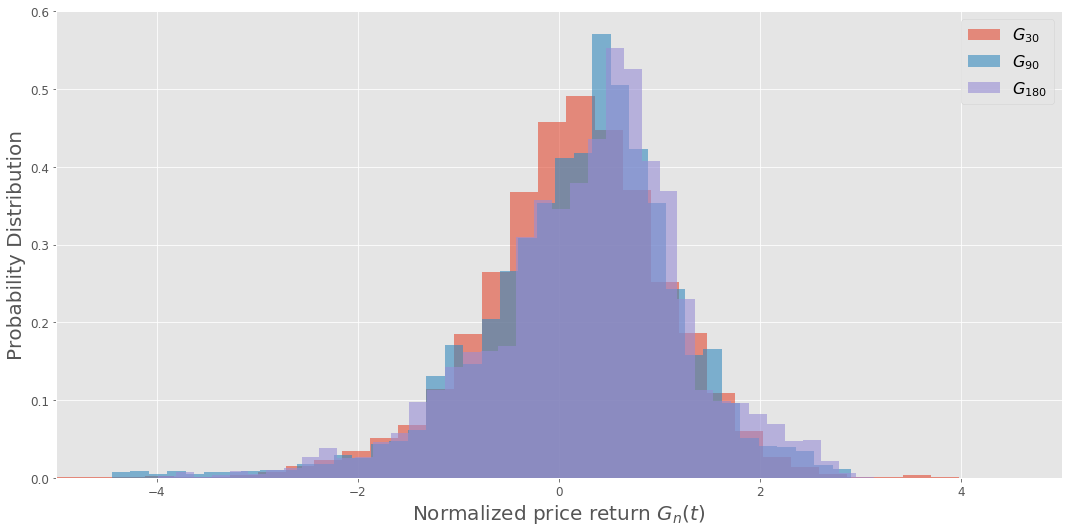

In [2]:
%matplotlib inline
cols,taus = ['G30','G90','G180'], [30,90,180]
apple = problem1(cols, taus)

fig, axes = plt.subplots(figsize=(15.0,7.5))
plot1(axes, apple, cols, [r'$G_{30}$', r'$G_{90}$', r'$G_{180}$'])
fig.tight_layout()
plt.show()

### Problem 2  (1 point)
Use the code example introduced in the video to calculate the probability distribution function for the absolute normalized price returns $|G_{30}|$, $|G_{90}|$, and $|G_{180}|$ of the previous problem. Plot the functions on a log-log scale together with a Gaussian distribution for comparison. Which of the following graphs is the closest to what you obtained? (When generating the histogram use $n=20$ bins for comparison).

- G11 <img src="fig/06/G11.png" width="400" />

- G12 <img src="fig/06/G12.png" width="400" />

- G13 <img src="fig/06/G13.png" width="400" />

- G14 <img src="fig/06/G14.png" width="400" />

- G15 <img src="fig/06/G15.png" width="400" />


### Answer 2
- G12

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)
def problem2(cols,taus):
    from datetime import datetime
    from pandas_datareader import data as pdr
    from pandas_datareader import wb as pwb
    # Logarithmic return of price time series
    def logreturn(Pt,tau=1):
        return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
    # Normalize data to have unit variance (<(x - <x>)^2> = 1)
    def normalized(data):
        return (data/np.sqrt(np.var(data)))
    # Add G_tau to data frame object
    def computeReturn(data, name, tau):
        data[name]=pd.Series(normalized(logreturn(data['Adj Close'].values, tau)),index=data.index[:-tau])

    # define time interval
    end_time   = datetime(2016, 12, 31)
    start_time = datetime(1989, 1, 1)
    apple      = pdr.DataReader('AAPL','yahoo',start_time,end_time)
    for col,tau in zip(cols,taus):
        computeReturn(apple, col, tau)
    return apple
def plot2(ax, data, cols, labels):
    # compute normalized probability distribution function
    def pdf(data,bins=50):
        hist, edges = np.histogram(data[~np.isnan(data)], bins=bins, density=True) # remove NaNs and compute histogram (returns bar heights and bar edges)
        edges   = (edges[:-1] + edges[1:])/2.0 # get bar centers
        nonzero = hist > 0.0                   # only keep non-zero points 
        return edges[nonzero], hist[nonzero]

    for col,lbl in zip(cols,labels):
        edges, hist = pdf(np.abs(data[col]), bins=20)
        ax.plot(edges, hist, label=lbl, lw=3)

    #plot gaussian
    x = np.logspace(-1, 1.2)
    ax.plot(x,np.abs(np.exp(-x**2/2)/np.sqrt(2*np.pi)),lw=6,ls='--',color='gray',alpha=0.8,label=r'Gaussian')
        
    ax.set_ylim(1e-4, 2e0)
    ax.set_xlim(1e-1, 2e1)
    ax.semilogx()
    ax.semilogy()
    ax.legend(loc=3)
    ax.set_xlabel(r'Absolute normalized price return $|G_n|$')
    ax.set_ylabel(r'Probability distribution')

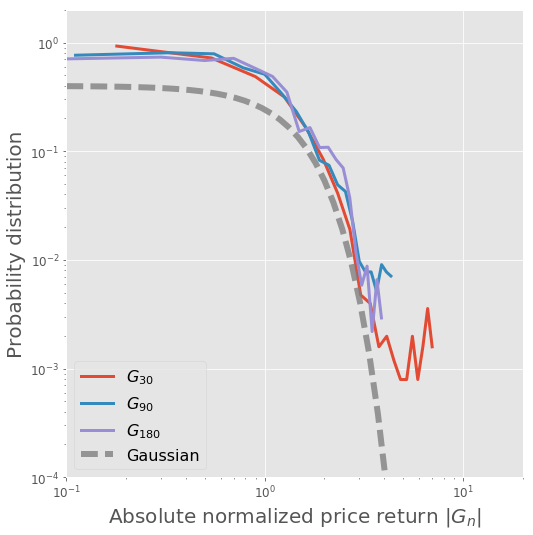

In [4]:
%matplotlib inline
cols,taus = ['G30','G90','G180'], [30,90,180]
apple = problem2(cols, taus)

fig, ax = plt.subplots(figsize=(7.5,7.5))
plot2(ax, apple, cols, [r'$G_{30}$', r'$G_{90}$', r'$G_{180}$'])
fig.tight_layout()
plt.show()

# Part 2

### Problem 3  (1 point)

In the video, we introduced a Stochastic dealer model in which two agents, $1$ and $2$ are trading stock with each other. We described this as a Stochastic system, in which the mid-price of each dealer $p_i(t)$ ($i=1,2$) is evolving in time following a one-dimensional random walk. The moment when the absolute value of the price difference $D(t) = p_1(t) - p_2(t)$ is larger than some given value $|D(t)| \ge L$ (which we called the spread $L$), we assumed a transaction takes place, in which dealer $1$ buys or sells from dealer $2$. The price of this transaction defines the market-price $P$, and it is given by the average price $A(t) = \frac{1}{2}(p_1(t) + p_2(t))$.

We showed how this dealer model, which consists of two 1D random walks, could be recast as a 2D random walk (in $D(t)$ vs $A(t)$ space) with absorbing boundary conditions (to describe the transaction criterion that determines when the random walk ends and a transaction takes place). We performed three sample simulations for a single trade, using a spread $L=0.01$ and obtained the following random walks
![](fig/06/G001.png)
Taking into account the fact that the initial condition was $p_1(0) = p_2(0) = p_0 = 100.25$, who was the buyer in each of the three random walks shown here, and at what price did he or she buy?

##### 1. (Walk 0) Dealer $1$ buys at $P\simeq 0.01$, (Walk 1) Dealer $1$ buys at $P\simeq 0.01$, and (Walk 2) Dealer $2$ buys at $P\simeq0.01$
##### 2. (Walk 0) Dealer $1$ buys at $P\simeq 0.003$, (Walk 1) Dealer $1$ buys at $P\simeq 0.003$, and (Walk 2) Dealer $2$ buys at $P\simeq 0.003$
##### 3. (Walk 0) Dealer $1$ buys at $P\simeq 100.247$, (Walk 1) Dealer $1$ buys at $P\simeq 100.253$, and (Walk 2) Dealer $2$ buys at $P\simeq100.253$
##### 4. (Walk 0) Dealer $1$ buys at $P\simeq 100.253$, (Walk 1) Dealer $1$ buys at $P\simeq 100.247$, and (Walk 2) Dealer $2$ buys at $P\simeq100.247$
##### 5. (Walk 0) Dealer $2$ buys at $P\simeq 0.01$, (Walk 1) Dealer $2$ buys at $P\simeq 0.01$, and (Walk 2) Dealer $1$ buys at $P\simeq0.01$
##### 6. (Walk 0) Dealer $2$ buys at $P\simeq 0.003$, (Walk 1) Dealer $2$ buys at $P\simeq 0.003$, and (Walk 2) Dealer $1$ buys at $P\simeq 0.003$
##### 7. (Walk 0) Dealer $2$ buys at $P\simeq 100.247$, (Walk 1) Dealer $2$ buys at $P\simeq 100.253$, and (Walk 2) Dealer $1$ buys at $P\simeq100.253$
##### 8. (Walk 0) Dealer $2$ buys at $P\simeq 100.253$, (Walk 1) Dealer $2$ buys at $P\simeq 100.247$, and (Walk 2) Dealer $1$ buys at $P\simeq100.247$

### Answer 3

##### 3. (Walk 0) Dealer $1$ buys at $P\simeq 100.247$, (Walk 1) Dealer $1$ buys at $P\simeq 100.253$, and (Walk 2) Dealer $2$ buys at $P\simeq100.253$

### Problem 4  (1 point)
Using the simple stochastic dealer model, we obtained the time series data for the stock price $P_n$ (where $n$ is the tick time, which increases by one at each transaction), by simulating over many transactions (random walks). Using this time series data, we computed the logarithmic return $G_\tau$ and saw that its distribution followed an exponential decay (at least for $\tau=1$). To see how this distribution depends on $\tau$, use the code example and data (`model1.txt`) introduced in the video to calculate the probability distribution function of the absolute normalized price return $|G_\tau|$ for $\tau=1$ and $\tau=16$. Use a semi-log plot to visualize the distributions. As a guide to the eye, you should also plot the exponential and Gaussian distributions. Which of the following graphs is the closest to what you obtain? (When generating the histogram use $n=20$ bins for comparison).

- G21 <img src="fig/06/G21.png" width="400" />

- G22 <img src="fig/06/G22.png" width="400" />

- G23 <img src="fig/06/G23.png" width="400" />

- G24 <img src="fig/06/G24.png" width="400" />


### Answer 4

- G24

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)
def problem4(tau1, tau2):
    # Logarithmic return of price time series
    def logreturn(Pt,tau=1):
        return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
    # Normalize data to have unit variance (<(x - <x>)^2> = 1)
    def normalized(data):
        return (data/np.sqrt(np.var(data)))

    dmy, data = np.loadtxt('./data/06/model1.txt', unpack=True)
    return normalized(logreturn(data, tau1)), normalized(logreturn(data,tau2))

def plot4(ax,g1,g16):
    def pdf(data,bins=50):
        hist,edges=np.histogram(data[~np.isnan(data)],bins=bins,density=True) # remove NaNs and compute histogram
        edges   = (edges[:-1] + edges[1:])/2.0 # get bar center
        nonzero = hist > 0.0                   # non-zero points 
        return edges[nonzero], hist[nonzero]

    for data,lbl in zip([g1,g16], [r'$G_1$', r'$G_{16}$']):
        edges, hist = pdf(np.abs(data), bins=20)
        ax.plot(edges, hist, lw=5, label=lbl)

    x = np.linspace(0, 5)
    ax.plot(x,2*np.exp(-x**2/2)/np.sqrt(2*np.pi),lw=6,ls='--',color='gray',alpha=0.6,label=r'Gaussian')
    ax.plot(x, 2*np.exp(-1.5*x),lw=6,color='k',ls='--',alpha=0.8,label=r'Exponential')
    ax.semilogy()
    ax.set_ylim([5e-4,1])
    ax.set_xlim([5e-1,6])
    ax.legend()
    ax.set_xlabel(r'Absolute normalized price return $|G_1|$')
    ax.set_ylabel(r'Probability density')

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(7.5,7.5))
g1,g2 = problem4(1,16)
plot4(ax, g1, g2)
fig.tight_layout()
plt.show()

# Part 3

### Problem 5  (1 point)
Use the code example introduced in the video to simulate the 2D random walk for one transaction of model 2 (the stochastic dealer model with a memory term). In this case, an extra "drift" or memory term $d \langle\Delta P\rangle_M$ is added to the update rule for the mid-prices $p_i(t)$ of the dealers. The constant $d$ determines whether the dealers are trend-followers ($d>0$) or contrarians ($d<0$), and $\langle \Delta P\rangle_M$ is a weighted average of the market prices increases $\Delta P = P_{n+1} - P_{n}$ over the previous $M$ trades. Notice that if $d=0$, we recover the original model 1 version, without memory.

Use exactly the same parameters as in the video, but take $d=-2,-1,0,1,2$, to simulate both contrarians and trend-followers. For comparison purposes, be sure to initialize the randon number generator using the same seed for all the simulations. Plot the random walk in 2D space $\left(A(t)=\frac{1}{2}(p_1(t) + p_2(t)), D(t) = p_1(t) - p_2(t)\right)$. Which of the following is the closest to what you obtained?

- G31 <img src="fig/06/G31.png" width="400" />

- G32 <img src="fig/06/G32.png" width="400" />

- G33 <img src="fig/06/G33.png" width="400" />

- G34 <img src="fig/06/G34.png" width="400" />


### Answer 5

- G32

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)

def model2RW(params,p0,deltapm):        # simulate Random-Walk for 1 transaction
    price = np.array([p0[0], p0[1]])    # initialize mid-prices for dealers p_1 and p_2
    cdp   = params['c']*params['dp']    # define random step size
    ddt   = params['d']*params['dt']    # define trend drift term
    Dt    = [price[0]-price[1]]         # initialize price difference as empty list
    At    = [np.average(price)]         # initialize avg price as empy list
    while np.abs(price[0]-price[1]) < params['L']:
        price=price+np.random.choice([-cdp,cdp],size=2) # random walk step for mid-prices Eq. (L4)
        price=price+ddt*deltapm         # Model 2 : add trend-following term in Eq. (L4)
        Dt.append(price[0]-price[1])
        At.append(np.average(price))
    return np.array(Dt),np.array(At)-At[0] # return difference array and average centered at zero
def plot5(ax, dvalues, labels):
    params={'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.25, 'M':1} # define model parameters
    p0 = [100.25, 100.25]
    deltapm = 0.003
    for dval,lbl in zip(dvalues, labels):
        np.random.seed(123456)
        params['d'] = dval
        Dt,At = model2RW(params, p0, deltapm) 
        ax.plot(At,Dt,alpha=0.8,label=lbl)    #plot RW
        ax.plot(At[-1],Dt[-1],marker='o',color='k') # plot last point
    ax.plot(0, 0, marker='s', color='k', markersize=10) # starting position
    ax.plot([-0.04,0.04],[params['L'],params['L']],color='k') #top absorbing boundary P=L
    ax.plot([-0.04,0.04],[-params['L'],-params['L']],color='k') #bottom absorbing boundary P=-L
    ax.set_ylim([-0.012, 0.012])
    ax.set_xlim([-0.02, 0.02])
    ax.legend(loc=4,framealpha=0.8)

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(7.5,7.5))
plot5(ax, [-2.0,-1.0,0.0,1.0,2.0], [r'$d = -2$',r'$d = -1$',r'$d = 0$',r'$d = +1$',r'$d = +2$'])
ax.set_xlim([-0.020,0.020])
fig.tight_layout()
plt.show()

### Problem 6  (1 point)
Use the code example and data ('model2.txt') introduced in the video to calculate the probability distribution function of the absolute price return $G_\tau$ for two different values of the time delay, $\tau=1$ and $\tau=16$. As a guide to the eye, you should also plot the exponential, Gaussian, and power-law distributions. Which of the following graphs is the closest to what you obtain? (When generating the histogram use $n=20$ bins for comparison).

- G41 <img src="fig/06/G41.png" width="600" />

- G42 <img src="fig/06/G42.png" width="600" />

- G43 <img src="fig/06/G43.png" width="600" />

- G44 <img src="fig/06/G44.png" width="600" />


### Answer 6

- G44

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)
def problem6(tau1, tau2):
    # Logarithmic return of price time series
    def logreturn(Pt,tau=1):
        return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
    # Normalize data to have unit variance (<(x - <x>)^2> = 1)
    def normalized(data):
        return (data/np.sqrt(np.var(data)))

    dmy, data = np.loadtxt('./data/06/model2.txt', unpack=True)
    return normalized(logreturn(data, tau1)), normalized(logreturn(data,tau2))

def plot6(ax,g1,g16):
    def pdf(data,bins=50):
        hist,edges=np.histogram(data[~np.isnan(data)],bins=bins,density=True) # remove NaNs and compute histogram
        edges   = (edges[:-1] + edges[1:])/2.0 # get bar center
        nonzero = hist > 0.0                   # non-zero points 
        return edges[nonzero], hist[nonzero]

    for data,lbl in zip([g1,g16], [r'$G_1$', r'$G_{16}$']):
        edges, hist = pdf(np.abs(data), bins=20)
        ax.plot(edges, hist, lw=5, label=lbl)

    x = np.linspace(0.1, 10)
    ax.plot(x, 2*np.exp(-1.5*x),lw=4,color='gray',ls='--',alpha=0.5,label=r'Exponential')
    ax.plot(x,2*np.exp(-x**2/2)/np.sqrt(2*np.pi),lw=6,ls=':',color='gray',alpha=0.6,label=r'Gaussian')
    ax.plot(x, 0.3*x**(-3), lw=6, color='k', ls='--', alpha=0.5, label=r'Power Law $\propto x^{-3}$')
    ax.semilogy()
    ax.semilogx()
    ax.set_xlim([5e-1,2e1])
    ax.set_ylim([5e-4,1])
    ax.legend()
    ax.set_xlabel(r'Absolute normalized price return $|G_1|$')
    ax.set_ylabel(r'Probability density')


In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,7.5))
g1,g2 = problem6(1,16)
plot6(ax, g1, g2)
fig.tight_layout()
plt.show()

# Part 4

### Problem 7  (1 point)
In the video, we showed how the price dynamics of the stochastic dealer model with memory (model 2) varied upon changing $d$ (the parameter controlling the strength of the trend-following, or contrarian behavior). In particular, we performed simulations for $d=-2,-1.25,0,+1.25,2$, where the averages over the historic price changes where taken over the last $M=10$ ticks. Using the code examples and data (`model2_M10_5d.txt`) introduced in the video, compute the probability distribution function for the absolute normalized price returns $G_1$ for the case when $d=-2$. Plot your data and compare with the Gaussian, exponential, and power-law distributions. Which of the following is the closest to what you obtained? Do you still have a power-law distribution ($\alpha=-3$), similar to the case when $d=1.25$ and $M=1$? (When generating the histogram use $n=20$ bins for comparison)

- G51 <img src="fig/06/G51.png" width="400" />

- G52 <img src="fig/06/G52.png" width="400" />

- G53 <img src="fig/06/G53.png" width="400" />

- G54 <img src="fig/06/G54.png" width="400" />


### Answer 7
 - G51, the distribution no longer coincides with the universal power-law behavior ($\alpha\simeq-3$), showing the sensitivity of the model to the specific parameter values.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)
def problem7(tau):
    # Logarithmic return of price time series
    def logreturn(Pt,tau=1):
        return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
    # Normalize data to have unit variance (<(x - <x>)^2> = 1)
    def normalized(data):
        return (data/np.sqrt(np.var(data)))

    price = pd.read_csv('./data/06/model2_M10_5d.txt', header=0, delim_whitespace=True,index_col=False)
    dprice= pd.DataFrame() #create empty frame
    for col in ['d+2','d+1','d0','d-1','d-2']: #populate frames with returns
        dprice[col] = normalized(logreturn(price[col].values,tau))
    return dprice

def plot7(ax,dprice):
    def pdf(data,bins=50):
        hist,edges=np.histogram(data[~np.isnan(data)],bins=bins,density=True) # remove NaNs and compute histogram
        edges   = (edges[:-1] + edges[1:])/2.0 # get bar center
        nonzero = hist > 0.0                   # non-zero points 
        return edges[nonzero], hist[nonzero]

    edges,hist = pdf(np.abs(dprice),bins=20)
    ax.plot(edges,hist,label=r'$d=-2$', lw=3)
    x = np.linspace(0.1, 10)
    ax.plot(x, 2*np.exp(-1.5*x),lw=4,color='gray',ls='--',alpha=0.5,label=r'Exponential')
    ax.plot(x,2*np.exp(-x**2/2)/np.sqrt(2*np.pi),lw=6,ls=':',color='gray',alpha=0.6,label=r'Gaussian')
    ax.plot(x, 0.3*x**(-3), lw=6, color='k', ls='--', alpha=0.5, label=r'Power Law $\propto x^{-3}$')
    ax.semilogy()
    ax.semilogx()
    ax.set_xlim([5e-1,2e1])
    ax.set_ylim([5e-4,1])
    ax.legend()
    ax.set_xlabel(r'Absolute normalized price return $|G_1|$')
    ax.set_ylabel(r'Probability density')

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(7.5,7.5))
dprice = problem7(1)
plot7(ax, dprice['d-2'])
fig.tight_layout()
plt.show()

### Problem 8  (1 point)
Using the code examples and data introduced in the video, compare the correlation function $C_{G_1}(n)$ for the 1-tick return $G_1$ of the model with memory (model 2), for the cases when the trend parameter $d$ and memory time $M$ are $d=1.25, M=1$ (`model2.txt`) and $d=1.25, M=10$ (`model2_M10_5d.txt`). Plot the data on a log-log scale. Which of the following is closest to what you observed?

- G61 <img src="fig/06/G61.png" width="400" />

- G62 <img src="fig/06/G62.png" width="400" />

- G63 <img src="fig/06/G63.png" width="400" />

- G64 <img src="fig/06/G64.png" width="400" />


### Answer 8

- G62

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)
def problem8(colM10,tau=1):
    # Logarithmic return of price time series
    def logreturn(Pt,tau=1):
        return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
    # Normalize data to have unit variance (<(x - <x>)^2> = 1)
    def normalized(data):
        return (data/np.sqrt(np.var(data)))

    priceM1   = np.loadtxt('./data/06/model2.txt', usecols=[1,])
    priceM10 = pd.read_csv('./data/06/model2_M10_5d.txt', header=0, delim_whitespace=True, index_col=False)
    dprice    = pd.DataFrame()
    dprice['M1'] = normalized(logreturn(priceM1, tau))
    dprice['M10']= normalized(logreturn(priceM10[colM10].values,tau))
    return dprice

def plot8(ax,dprice1,dprice10):
    # compute self-correlation of vector v
    def auto_correlate(v):
        # np.correlate computes C_{v}[k] = sum_n v[n+k] * v[n]
        corr = np.correlate(v,v,mode="full") # correlate returns even array [0:2*nums-1] centered at nums-1
        return corr[len(v)-1:]/len(v) # take positive values and normalize by number of points
    ax.plot(auto_correlate(dprice1), label=r'$M=1$')
    ax.plot(auto_correlate(dprice10), label=r'$M=10$')
    ax.set_xlim(5e-1,1e3)
    ax.set_ylim(-0.2, 1.0)
    ax.legend()
    ax.semilogx()
    ax.set_xlabel(r'Time n (ticks)')
    ax.set_ylabel(r'Time Correlation function $C_{G_{1}}(t)$')

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(7.5,7.5))
dprice = problem8('d+1')
plot8(ax,dprice['M1'], dprice['M10'])
fig.tight_layout()
plt.show()

# Homework for Week 6

### Homework 1  (3 points)

The original dealer model that we have used in the course is a minimal model. As such, there is ample room for improvement. One of the obvious modifications, to obtain a more realistic description, is to consider $N > 2$ dealers. The dynamics of the dealers are unchanged,


$$
p_i(t + \Delta t) = p_i(t) + d\langle\Delta P\rangle_M \Delta t + c f_i(t), \qquad i=1,2\tag{M1}
$$

$$
f_i(t) = \begin{cases}
    +\Delta p & \mathrm{prob.} 1/2 \\
    -\Delta p & \mathrm{prob.} 1/2\tag{M2}
\end{cases}
$$

$$
\langle\Delta P\rangle_M = \frac{2}{M (M+1)}\sum_{k=0}^{M-1}(M-k)\Delta P(n-k)\tag{M3}
$$

as well as the transaction condition
$$
\lvert p_i(t) - p_j(t) \rvert \ge L\tag{M4}.
$$

Thus, we have $N$ independent random walks (evolving according to Eq.(M1-M2)). Whenever the distance between the prices of any two dealers is greater than the spread $L$ (Eq. (M4)), these two (say $i$ and $j$) can carry out a transaction. If a transaction takes place between $i$ and $j$, the market price is updated to reflect this, $(P_{n+1} = \frac{1}{2}(p_i(t) + p_j(t)))$, and the mid-prices of $i$ and $j$ are reset accordingly ($p_i(t+1) = p_j(t+1) = P_{n+1}$). We must also care about how the mid-prices of the remaining dealers ($k\ne i\ne j$) are affected by this transaction. Assume the following:

- If more than two pairs of dealers satisfy the transaction condition, the dealer with the highest price will buy from the dealer with the lowest price. If more than two dealers have the same price, we chose only one of them. In this case, only one transaction between two dealers can take place at any given time.
- The remaining dealers switch their prices to the new market price $(p_k(t+1) = P_{n+1})$ with a probability $r$, and they keep their old prices with probability ($1-r$). Here, $0\le r\le 1$ and $r$ is a constant equal for all dealers.

Modify the code shown below (for model 2), to simulate a system with $N=100$ dealers with a switching rate $r=0.6$.

In [ ]:
# Original two dealer code

params={'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2,'d':1.00,'M':10} # define model parameters
p0 = np.ones(2)*100.25

def model2(params,p0,numt):
    
    # compute running average Eq.(L6)
    def avgprice(dpn): 
        M = len(dpn)     
        weights  = np.array(range(1,M+1))*2.0/(M*(M+1))
        return weights.dot(dpn)

    # update prices for transaction between the two dealers and return new market price
    def transactionUpdate(pt):
        newprice = np.average(pt)  #set mid-prices to new market price Eq.(L2)
        pt[:]    = newprice
        return newprice
    
    # ... variable initializations ...
    mktprice = np.zeros(numt)   # initialize market price P(n)
    dmktprice= np.zeros(numt)   # initialize change in price dP(n) needed for running average
    ticktime = np.zeros(numt,dtype=np.int) #initialize array for tick times
    price    = p0               #initialize dealer's mid-price (p1,p2)
    time,tick= 0,0 # real time(t) and time time (n)
    deltapm  = 0.0 # trend term d <dP>_m dt for current random walk
    cdp      = params['c']*params['dp'] # define random step size
    ddt      = params['d']*params['dt'] # define amplitude of trend term
    
    while tick < numt: # loop over ticks
        while np.abs(price[0]-price[1]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm + np.random.choice([-cdp,cdp], size=2) # random walk step Eq.(L4)
            time += 1 #update real time 

        mktprice[tick] = transactionUpdate(price)                      # save market price
        
        # ... finalize loop ...
        dmktprice[tick]= mktprice[tick] - mktprice[np.max([0,tick-1])] # save dP(n) = P(n) - P(n-1)
        ticktime[tick] = time # save transaction time
        tick += 1             #update ticks
        tick0 = np.max([0, tick - params['M']])       #compute tick start for running average
        deltapm = avgprice(dmktprice[tick0:tick])*ddt #compute updated trend term for current tick time
    return ticktime,mktprice

Choose the most appropriate updated `model2` code from the codes shown below (C1,C2,C3,C4). Note that unchanged blocks from the original code are not shown.

In [ ]:
# C1

params={'N':100,'r':0.6,'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.00, 'M':10} # define model parameters
p0 = np.ones(params['N'])*100.25

def model2(params,p0,numt):
    pswitch  = np.array([1.0-params['r'], params['r']]) # switching rates
    
    # compute running average Eq.(L6)
    def avgprice(dpn): 
    # ...

    # return transaction candidate: pair (i,j) with largest price difference
    def transactionPair(pt):  
        return [np.min(pt), np.max(pt)]

    # update prices for transaction between the two dealers (i,j) and return new market price
    def transactionUpdate(i,j,pt):
        newprice = np.average([pt[i], pt[j]])
        switch   = np.random.choice([True,False], p=pswitch,size=params['N']) # determine which dealers update price
        pt[switch] = newprice
        return newprice

    # .... variable initializations ...
    
    while tick < numt: 
        [i,j]    = transactionPair(price)   # transaction candidate
        while np.abs(price[i]-price[j]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm + np.random.choice([-cdp,cdp], size=params['N']) # random walk step Eq.(L4)
            [i,j] = transactionPair(price) # update transaction candidate
            time += 1                      # update real time
        
        mktprice[tick] = transactionUpdate(i,j,price)                  # save market price

        # ... finalize loop ...
    return ticktime,mktprice

In [ ]:
# C2

params={'N':100,'r':0.6,'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.00, 'M':10} # define model parameters
p0 = np.ones(params['N'])*100.25

def model2(params,p0,numt):
    pswitch  = np.array([params['r'], 1.0-params['r']]) #switching rates 

    # compute running average Eq.(L6)
    def avgprice(dpn): 
    # ...

    # return transaction candidate: pair (i,j) with larget price difference
    def transactionPair(pt):  
        return [np.min(pt), np.max(pt)]

    # update prices for transaction between the two dealers (i,j) and  return new market price 
    def transactionUpdate(i,j,pt):
        newprice = np.average([pt[i], pt[j]])
        switch   = np.random.choice([True,False], p=pswitch,size=params['N']) # determine which dealers update price
        pt[switch] = newprice
        return newprice

    # ... variable initializations ...

    [i,j]    = transactionPair(price)   # transaction candidate
    while tick < numt: # loop over ticks
        while np.abs(price[i]-price[j]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm + np.random.choice([-cdp,cdp], size=params['N']) # random walk step Eq.(L4)
            [i,j] = transactionPair(price) # update transaction candidate
            time += 1                      # update real time
        
        mktprice[tick] = transactionUpdate(i,j,price)

        # ... finalize loop ...
    return ticktime,mktprice

In [5]:
# C3

params={'N':100,'r':0.6,'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.00, 'M':10} # define model parameters
p0 = np.ones(params['N'])*100.25

def model2(params,p0,numt):
    pswitch  = np.array([params['r'], 1.0-params['r']]) #switching rates 

    # compute running average Eq.(L6)
    def avgprice(dpn): 
    # ...

    # return transaction candidate: pair (i,j) with larget price difference
    def transactionPair(pt):  
        return [np.argmin(pt), np.argmax(pt)]

    # update prices for transaction between the two dealers (i,j) and  return new market price 
    def transactionUpdate(i,j,pt):
        newprice = np.average([pt[i], pt[j]])
        switch   = np.random.choice([True,False], p=pswitch,size=params['N']) # determine which dealers update price
        switch[i]=switch[j]=True
        pt[switch] = newprice
        return newprice

    # ... variable initializations
    
    while tick < numt: # loop over ticks
        [i,j]    = transactionPair(price)   # transaction candidate
        while np.abs(price[i]-price[j]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm + np.random.choice([-cdp,cdp], size=params['N']) # random walk step Eq.(L4)
            [i,j] = transactionPair(price) # update transaction candidate
            time += 1                      # update real time
        
        mktprice[tick] = transactionUpdate(i,j,price)

        # ... finalize loop ...
    return ticktime,mktprice

In [ ]:
# C4

params={'N':100,'r':0.6,'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.00, 'M':10} # define model parameters
p0 = np.ones(params['N'])*100.25

def model2(params,p0,numt):
    pswitch  = np.array([params['r'], 1.0-params['r']]) #switching rates 

    # compute running average Eq.(L6)
    def avgprice(dpn): 
    # ... 

    # return indices (i,j) of dealers with smallest and largest prices
    def transactionPair(pt):  
        return [np.argmax(pt), np.argmin(pt)]

    # update prices for transaction between the two dealers (i,j) and  return new market price 
    def transactionUpdate(i,j,pt):
        newprice = np.average([pt[i], pt[j]])
        switch   = np.random.choice([False,True], p=pswitch,size=params['N']) # determine which dealers update price
        switch[i]=switch[j]=True
        pt[switch] = newprice
        return newprice

    # ... variable initializations ...
    
    [i,j]    = transactionPair(price)   # transaction candidate
    while tick < numt: # loop over ticks
        while np.abs(price[i]-price[j]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm + np.random.choice([-cdp,cdp], size=params['N']) # random walk step Eq.(L4)
            time += 1                      # update real time
        
        [i,j] = transactionPair(price)     # update transaction candidate
        mktprice[tick] = transactionUpdate(i,j,price)

        # ... finalize loop ...
    return ticktime,mktprice

### Answer 1

- C3

### Homework 2  (3 points)

Continuing with the previous problem, we also would like to consider the case where the trend-following parameter $d_i$ is different for different dealers, such that

$$
p_i(t + \Delta t) = p_i(t) + d_i\langle\Delta P\rangle_M \Delta t + c f_i(t), \qquad i=1,2\tag{M1}
$$

$$
 d_i = \bar{d}(n) + \Delta d_i
$$
where $\bar{d}$ is the average trend-following effect (which is changing in time), and $\Delta d_i$ describes each dealer's deviation from this average. We assume that the $\Delta d_i$ are given by a random normal distribution with zero average and standard deviation $\sigma$. Note that the $\Delta d_i$, for a given $i$, are constant (characteristic of each dealer). However, the average trend-following effect is evolving in time according to the following rule (Yamada et al., PRE, 2009)
$$
\bar{d}(n+1) = (1 - e_0) \bar{d}(n) + \phi(n)
$$
where $e_0$ is a constant ($0<e_0<1$) and $\phi(n)$ is an independent random noise
$$
\phi(n) = \begin{cases}
+0.01 & \text{probability 1/2} \\
-0.01 & \text{probability 1/2}
\end{cases}
$$

Modify the code to simulate a system with $e_0 = 10^{-4}$ and $\sigma = 0.1$.
Choose the most appropriate from the codes shown below (C1,C2,C3,C4). Note that unchanged blocks from the code of the previous problem are not shown.

In [ ]:
# C1

params={'e0':1e-4,'sigma':0.1,'N':100,'r':0.6,'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.00, 'M':10} # define model parameters
p0  = np.ones(params['N'])*100.25

def model2(params,p0,numt):
    pswitch  = np.array([1.0-params['r'], params['r']]) #switching rates 
    
    # compute running average Eq.(L6)
    def avgprice(dpn): 
    #...

    # return indices (i,j) of dealers with smallest and largest prices
    def transactionPair(pt):  
    #...

    # update prices for transaction between the two dealers (i,j) and  return new market price
    def transactionUpdate(i,j,pt):
    #...

    # ... variable initializations
    deltapm  = 0.0                                           # trend term <dP>_m dt for current random walk
    dbar     = params['d']                                   # define average trend following effect \bar{d}
    di       = params['sigma']*np.random.randn(params['N'])  # trend following parameter for dealer i

    while tick < numt: # loop over ticks
        [i,j]    = transactionPair(price)   # transaction candidate
        while np.abs(price[i]-price[j]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm*(dbar+di) + np.random.choice([-cdp,cdp], size=params['N']) # random walk step Eq.(L4)
            [i,j] = transactionPair(price) # update transaction candidate
            time += 1                      # update real time

        dbar = (1.0 - params['e0'])*dbar + np.random.choice([0.01,-0.01])
        di   = params['sigma']*np.random.randn(params['N'])
        mktprice[tick] = transactionUpdate(i,j,price)

        # ... finalize loop 

        tick += 1             # update ticks
        tick0 = np.max([0, tick - params['M']])       # compute tick start for running average
        deltapm = avgprice(dmktprice[tick0:tick])*params['dt'] # compute updated trend term for current tick time
    return ticktime,mktprice

In [23]:
# C2

params={'e0':1e-4,'sigma':0.1,'N':100,'r':0.6,'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.00, 'M':10} # define model parameters
p0  = np.ones(params['N'])*100.25

def model2(params,p0,numt):
    pswitch  = np.array([1.0-params['r'], params['r']]) #switching rates 
    
    # compute running average Eq.(L6)
    def avgprice(dpn): 
    #...

    # return indices (i,j) of dealers with smallest and largest prices
    def transactionPair(pt):  
    # ...

    # update prices for transaction between the two dealers (i,j) and  return new market price
    def transactionUpdate(i,j,pt):
    # ...

    # ... variable initializations
    deltapm  = 0.0                                           # trend term <dP>_m dt for current random walk
    dbar     = params['d']                                   # define average trend following effect \bar{d}
    di       = params['sigma']*np.random.randn(params['N'])  # trend following parameter for dealer i

    while tick < numt: # loop over ticks
        [i,j]    = transactionPair(price)   # transaction candidate
        while np.abs(price[i]-price[j]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm*(dbar+di) + np.random.choice([-cdp,cdp], size=params['N']) # random walk step Eq.(L4)
            [i,j] = transactionPair(price) # update transaction candidate
            time += 1                      # update real time

        dbar = (1.0 - params['e0'])*dbar + np.random.choice([0.01,-0.01])        
        mktprice[tick] = transactionUpdate(i,j,price)
        
        # ... finalize loop 
        tick += 1             # update ticks
        tick0 = np.max([0, tick - params['M']])       # compute tick start for running average
        deltapm = avgprice(dmktprice[tick0:tick])*params['dt'] # compute updated trend term for current tick time
    return ticktime,mktprice

In [ ]:
# C3

params={'e0':1e-4,'sigma':0.1,'N':100,'r':0.6,'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.00, 'M':10} # define model parameters
p0  = np.ones(params['N'])*100.25

def model2(params,p0,numt):
    pswitch  = np.array([1.0-params['r'], params['r']]) #switching rates 

    # compute running average Eq.(L6)
    def avgprice(dpn): 
    # ...

    # return indices (i,j) of dealers with smallest and largest prices
    def transactionPair(pt):  
    # ...

    # update prices for transaction between the two dealers (i,j) and  return new market price
    def transactionUpdate(i,j,pt):
    #...

    # ... variable initializations
    deltapm  = 0.0                                           # trend term <dP>_m dt for current random walk
    dbar     = params['d']                                   # define average trend following effect \bar{d}
    di       = params['sigma']*np.random.randn(params['N'])  # trend following parameter for dealer i

    while tick < numt: # loop over ticks
        [i,j]    = transactionPair(price)   # transaction candidate
        while np.abs(price[i]-price[j]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm*(dbar+di) + np.random.choice([-cdp,cdp], size=params['N']) # random walk step Eq.(L4)
            dbar  = (1.0 - params['e0'])*dbar + np.random.choice([0.01,-0.01])              
            [i,j] = transactionPair(price) # update transaction candidate
            time += 1                      # update real time
      
        mktprice[tick] = transactionUpdate(i,j,price)

        # ... finalize loop 
        tick += 1             # update ticks
        tick0 = np.max([0, tick - params['M']])       # compute tick start for running average
        deltapm = avgprice(dmktprice[tick0:tick])*params['dt'] # compute updated trend term for current tick time
    return ticktime,mktprice

In [ ]:
# C4

params={'e0':1e-4,'sigma':0.1,'N':100,'r':0.6,'L':0.01,'c':0.01,'dp':0.01,'dt':0.01**2, 'd':1.00, 'M':10} # define model parameters
p0  = np.ones(params['N'])*100.25

def model2(params,p0,numt):
    pswitch  = np.array([1.0-params['r'], params['r']]) #switching rates 

    # compute running average Eq.(L6)
    def avgprice(dpn): 
    # ...

    # return indices (i,j) of dealers with smallest and largest prices
    def transactionPair(pt):  
    # ...

    # update prices for transaction between the two dealers (i,j) and  return new market price
    def transactionUpdate(i,j,pt):

    # ... variable initializations
    deltapm  = 0.0                                                  # trend term <dP>_m dt for current random walk
    dbar     = params['d']                                          # define average trend following effect \bar{d}
    di       = dbar + params['sigma']*np.random.randn(params['N'])  # trend following parameter for dealer i

    while tick < numt: # loop over ticks
        [i,j]    = transactionPair(price)   # transaction candidate
        while np.abs(price[i]-price[j]) < params['L']: # transaction criterion Eq.(L1)
            price = price + deltapm*di + np.random.choice([-cdp,cdp], size=params['N']) # random walk step Eq.(L4)
            dbar  = (1.0 - params['e0'])*dbar + np.random.choice([0.01,-0.01]) 
            [i,j] = transactionPair(price) # update transaction candidate
            time += 1                      # update real time

        di   = dbar + params['sigma']*np.random.randn(params['N'])
        mktprice[tick] = transactionUpdate(i,j,price)

        # ... finalize loop
        tick += 1             # update ticks
        tick0 = np.max([0, tick - params['M']])       # compute tick start for running average
        deltapm = avgprice(dmktprice[tick0:tick])*params['dt'] # compute updated trend term for current tick time
    return ticktime,mktprice

### Answer 2

- C2